In [5]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import cm
import matplotlib
import numpy as np
from collections import Counter
from paired_connectivity_analyzer import EEGPairedPermutationAnalyser, DrawEEG
from plotting_utils import plot_compute_sign_differences, draw_edges_by_dict, plot_reproducibility_pattern
from scipy import stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv('eeg_dataframe_nansfilled.csv', index_col=0)
analyzer = EEGPairedPermutationAnalyser(data_df=df, num_perm=1000, thres=0.001)

In [6]:
open_name = [f'{analyzer.channel_bivar[i]}_{1}_fo' for i in range(len(analyzer.channel_bivar))]
close_name = [f'{analyzer.channel_bivar[i]}_{1}_fz' for i in range(len(analyzer.channel_bivar))]

,C3/C4_1_fo,C3/Cz_1_fo,C3/O1_1_fo,C3/O2_1_fo,C3/P3_1_fo,C3/P4_1_fo,C3/Pz_1_fo,C3/T4_1_fo,C3/T5_1_fo,C3/T6_1_fo,...,T4/T5_1_fo,T4/T6_1_fo,T5/O1_1_fo,T5/O2_1_fo,T5/P3_1_fo,T5/P4_1_fo,T5/Pz_1_fo,T5/T6_1_fo,T6/O1_1_fo,T6/O2_1_fo
abs_,-0.034329,0.553366,-0.595306,-0.746215,0.026977,-0.124134,-0.117159,-1.237112,-1.053519,-1.027283,...,-1.465228,-0.566446,-0.086727,-0.612314,-0.408238,-0.982732,-0.717576,-0.921790,-0.509709,0.082941
agv_,-1.165031,-0.276993,-1.017594,-1.649858,-0.481757,-1.515901,-0.927753,-2.773702,-0.712422,-3.999957,...,-2.427721,-1.574942,-0.537927,-1.150458,-0.039146,-1.233193,-0.694503,-3.314944,-1.778406,-0.319876
ami_,-0.869325,-0.100816,-1.731344,-2.502260,-0.474806,-1.475151,-0.717576,-2.078306,-3.591649,-2.654844,...,-1.813569,-0.805108,-0.909948,-1.515901,-1.944481,-3.397766,-3.169760,-2.712253,-0.751477,-0.147275
ast_,-1.455406,-1.237112,-1.040327,-1.510711,-0.671730,-3.016859,-1.125417,-5.397938,-0.843845,-1.936232,...,-3.917162,-1.150458,-0.689418,-1.168705,-1.327357,-3.314944,-3.136956,-1.490230,-1.070226,-0.000262
avk_,-0.247615,-0.114830,-1.465228,-1.515901,-1.366732,-0.921790,-1.445683,-2.013357,-1.393877,-1.380211,...,-5.045754,-0.995292,-0.415079,-1.056841,-1.206160,-1.327357,-1.004799,-1.417085,-1.353433,-0.664203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vls_,0.352012,0.505687,0.411902,0.054691,0.806311,0.265080,0.211445,-0.022234,0.562421,-0.058302,...,0.133201,0.469043,0.590385,0.149510,0.655679,0.202784,0.141327,0.109144,0.149510,0.305841
voo_,-0.263441,0.252898,-0.756757,-0.895296,-0.547397,-0.597727,-0.486399,-1.260946,-0.863622,-1.465228,...,-2.936540,-1.027283,-0.540291,-0.964133,-0.234031,-0.846653,-0.686880,-1.318814,-0.764710,-0.279251
zab_,-0.629461,-0.412798,-0.007616,-0.945811,0.062339,-0.786120,0.024482,-1.850146,-0.578427,-1.187268,...,-2.456782,-0.392306,-0.484077,-1.087183,-0.392306,-0.849466,-0.666708,-1.004799,-0.317618,-1.389301
zak_,-0.733135,-0.666708,-0.609876,-1.217660,-0.022234,-0.641797,-0.512050,-4.443682,-0.709851,-2.235857,...,-1.626161,-1.417085,-0.727933,-1.264972,-0.493374,-2.180171,-1.828024,-3.489314,-2.673564,-3.442336


<AxesSubplot:>

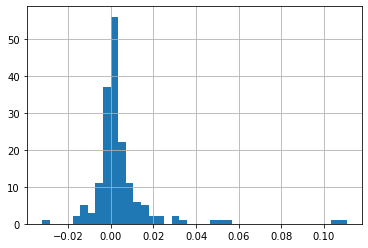

In [36]:
analyzer.num_perm = 10000
analyzer.get_subgroup(size=30)
emp_mean_diffs, p_val = analyzer.ttest_difference_paired(band=1)
(emp_mean_diffs, p_val_perm), perm_mean_diffs = analyzer.perm_difference_paired(band=1)

p_df = pd.DataFrame(np.vstack([p_val, p_val_perm]).T,columns=['p_val_param', 'p_val_noparam'])
p_df.diff(axis=1)['p_val_noparam'].hist(bins=40)

<AxesSubplot:>

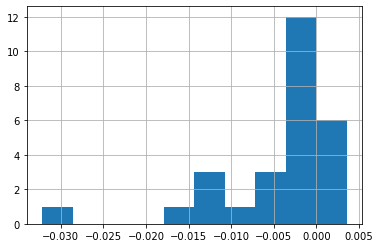

In [39]:
p_df[p_df["p_val_noparam"]<0.05].diff(axis=1)['p_val_noparam'].hist()

In [41]:
p_df[p_df["p_val_noparam"]<0.05]

,p_val_param,p_val_noparam
21,0.019817,0.0149
22,0.023252,0.0212
31,0.010277,0.0102
52,0.022366,0.0142
60,0.029430,0.0274
83,0.011371,0.0097
86,0.024422,0.0136
87,0.029890,0.0262
92,0.019330,0.0194
94,0.023923,0.0222
